<a href="https://colab.research.google.com/github/tanu-shreey/-HactoberFest2022-For_All_Beginers-/blob/main/PG_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
import nltk


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset=pd.read_csv("/content/drive/MyDrive/Bangalore Data.csv", encoding='ISO-8859-1')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,2,3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PGName     1204 non-null   object 
 1   Ratings    1204 non-null   float64
 2   resultbox  1160 non-null   object 
 3   locality   1203 non-null   object 
 4   review     660 non-null    object 
 5   City       1205 non-null   object 
dtypes: float64(1), object(5)
memory usage: 48.0+ MB


In [ ]:
dataset

,PGName,Ratings,resultbox,locality,review,City
0,Chegus Perennial Pg For Men and Women,4.5,1 Ratings,K R Road Basavanagudi,NaN,Bangalore
1,Bhagyalakshmi Paying Guest,3.8,10 Ratings,2nd Block Banashankari 1st Stage,NaN,Bangalore
2,Shree Nilaya Paying Guest For Men,4.0,1 Ratings,Shivaganga Mutt Road Chamarajpet,NaN,Bangalore
3,Siddarth Associates,3.8,123 Ratings,J.C. Road Jc Road,The room is very nice and cozy. Important plac...,Bangalore
4,Sri Lakshmi Pg For Gents,3.7,28 Ratings,Pipeline Road Malleswaram,NaN,Bangalore
...,...,...,...,...,...,...
1048570,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dataset=dataset[['PGName','Ratings','locality','review','City']]

In [ ]:
dataset.isnull().sum()

PGName      1047371
Ratings     1047371
locality    1047372
review      1047915
City        1047370
dtype: int64

In [ ]:
dataset=dataset.dropna()

In [ ]:
dataset.duplicated().sum()

108

In [ ]:
dataset=dataset[dataset['Ratings']>3]


In [ ]:
dataset

,PGName,Ratings,locality,review,City
3,Siddarth Associates,3.8,J.C. Road Jc Road,The room is very nice and cozy. Important plac...,Bangalore
6,Shree Krishna Gujarati Pg,3.7,Banashakri Jayanagar 4th Block,Pg feels homely. Veg food and getting food on ...,Bangalore
7,Green Homes Pg,3.3,6th C Main Jayanagar 4th Block,I absolutely enjoyed my interactions with the ...,Bangalore
9,Atithi Stayings Gents,4.6,Cross Road Corporation Circle,Good pg good condition everything is fine,Bangalore
10,SHIRIDI SAI GENTS PG,4.4,13th Cross Jayanagar 5th Block,"Best host, had a really good experience..",Bangalore
...,...,...,...,...,...
1199,Katra Pg House,4.8,Maharaja Agrasen Marg Govindpuri,Best pg in Govindpuri.,Delhi
1200,Roost Coliving,4.8,Orchid Island Gate No-2,This pg is worth more than 5 stars. It truly s...,Delhi
1201,Supreme Paying Guest Accomodation,4.4,18 Meter Road Sector 26,Pg is good in fooding and lodging.,Delhi
1202,Book My Bed,3.6,E-80 South Extension 1,Very good option for pg accommodation in south...,Delhi


In [ ]:
#dataset['PGdata']=dataset['PGName']+dataset['locality']
#dataset['PGdata']=dataset['PGName']+dataset['locality']

In [ ]:
reviews_list = list(dataset['review'])

In [ ]:
import nltk
from nltk import tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [ ]:
# vader builds upon widely-known text analysis libraries(it generate sentiment score)

In [ ]:
nltk.download('vader_lexicon') # fir SentimentIntensityAnalyzer 
nltk.download('punkt') # fir tokenize

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
sid = SentimentIntensityAnalyzer()


In [ ]:
review_tok = tokenize.sent_tokenize(reviews_list[0])
review_tok



['The room is very nice and cozy.',
 'Important places like bus stop and hotels are easily accessible.',
 'I liked it.']

In [ ]:
#positive sentiment : (compound score >= 0.05) 
#neutral sentiment : (compound score > -0.05) and (compound score < 0.05) 
#negative sentiment : (compound score <= -0.05)

In [ ]:
for sentence in review_tok:
    print('Sentence text:')
    print(sentence)
    sentence_polarity_scores = sid.polarity_scores(sentence)

    for key in sorted(sentence_polarity_scores.keys()):
        print('{}: {}, '.format(key,sentence_polarity_scores[key]), end='')
    print('\n')


Sentence text:
The room is very nice and cozy.
compound: 0.4754, neg: 0.0, neu: 0.66, pos: 0.34, 

Sentence text:
Important places like bus stop and hotels are easily accessible.
compound: 0.5423, neg: 0.148, neu: 0.403, pos: 0.45, 

Sentence text:
I liked it.
compound: 0.4215, neg: 0.0, neu: 0.263, pos: 0.737, 



In [ ]:

# Augment the dataset with the overall polarity score of the review,
# as obtained using VADER on the review level.
# polarity shows that the word is positive or negative(LIWC category)
reviews_polarity = []

for i, review in enumerate(reviews_list):
  review_polarity_scores = sid.polarity_scores(review)
  review_polarity_scores_compound = review_polarity_scores['compound']
  '''Uncomment this to print the sentiment score of every review in the dataset.
  
  print('Review text:')
  print(review)
  print('Review #{:d}: '.format(i_review), end='')
  for key in sorted(review_polarity_scores.keys()):
      print('{}: {:.4f}, '.format(key,review_polarity_scores[key]), end='')
      print('')  '''

  reviews_polarity.append(review_polarity_scores_compound)

In [ ]:
dataset['compound_score'] = reviews_polarity
dataset.head()

,PGName,Ratings,locality,review,City,compound_score
3,Siddarth Associates,3.8,J.C. Road Jc Road,The room is very nice and cozy. Important plac...,Bangalore,0.8553
6,Shree Krishna Gujarati Pg,3.7,Banashakri Jayanagar 4th Block,Pg feels homely. Veg food and getting food on ...,Bangalore,0.4019
7,Green Homes Pg,3.3,6th C Main Jayanagar 4th Block,I absolutely enjoyed my interactions with the ...,Bangalore,0.9150
9,Atithi Stayings Gents,4.6,Cross Road Corporation Circle,Good pg good condition everything is fine,Bangalore,0.7650
10,SHIRIDI SAI GENTS PG,4.4,13th Cross Jayanagar 5th Block,"Best host, had a really good experience..",Bangalore,0.8122


In [ ]:
dataset.describe()

,Ratings,compound_score
count,654.000000,654.000000
mean,4.201142,0.725910
std,0.431563,0.240411
min,3.100000,-0.526700
25%,3.900000,0.624900
50%,4.200000,0.806200
75%,4.518214,0.888450
max,5.000000,0.983200


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 654 entries, 3 to 1203
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PGName          654 non-null    object 
 1   Ratings         654 non-null    float64
 2   locality        654 non-null    object 
 3   review          654 non-null    object 
 4   City            654 non-null    object 
 5   compound_score  654 non-null    float64
dtypes: float64(2), object(4)
memory usage: 35.8+ KB


In [ ]:
import matplotlib.pyplot as plt


Text(0, 0.5, 'No. of reviews')

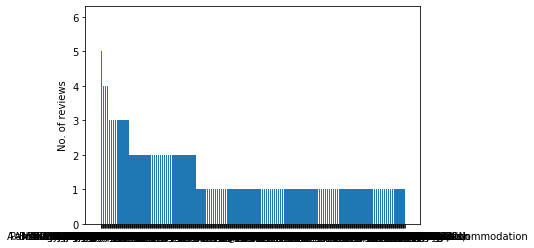

In [ ]:
plt.bar(dataset['PGName'].unique(), dataset['PGName'].value_counts())
plt.ylabel('No. of reviews')

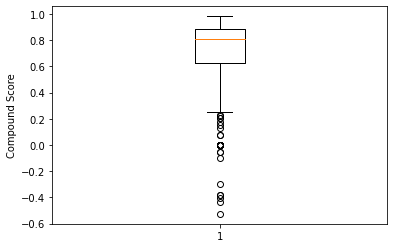

In [ ]:
plt.boxplot(dataset['compound_score'])
plt.ylabel('Compound Score')
plt.show()

In [ ]:

dataset.to_csv('PG_reviews.csv', index=False)

In [ ]:
dataset=pd.read_csv("/content/PG_reviews.csv", encoding='ISO-8859-1')


In [ ]:
dataset=dataset[dataset['compound_score']>0.9]


In [ ]:
dataset=dataset[['PGName','Ratings','locality','City']]


In [ ]:
dataset.reset_index(inplace=True)
data_dict =dataset.to_dict('Records')
data_dict

In [ ]:
data_dict

In [ ]:
dataset.to_csv('PG-data.csv', index=False)


In [ ]:
dataset_Bangalore= dataset[dataset['City']=='Bangalore']

In [ ]:
dataset_Bangalore.shape

(33, 5)

In [ ]:
dataset_Bangalore

,index,PGName,Ratings,locality,City
0,2,Green Homes Pg,3.3,6th C Main Jayanagar 4th Block,Bangalore
1,5,Reddys Residency,3.6,Vidya Jayanagar 4th T Block,Bangalore
2,6,AANANAYA PG FOR WOMEN AND GIRLS,3.9,Richmond Road Shanthinagar,Bangalore
3,9,Udupi Upahar Pg For Men,3.9,Colony Banashankari 1st Stage,Bangalore
4,12,My Home Pg For Men,3.7,T.R Nagar Basavanagudi,Bangalore
5,14,Eterna Pg Accommadation,4.6,4th Main Road Basavanagudi,Bangalore
6,16,Misbah Homestay,4.2,Lalbagh Fort Road V V Puram,Bangalore
7,19,Vaishnavi Paying Guest,4.4,2nd Cross Jp Nagar,Bangalore
8,25,Sri Jayadurga Mens Pg,4.2,No.90/2 Vijayanagar,Bangalore
9,32,Pankaja Paying Guest,4.7,Cross Banashankari 2nd Stage,Bangalore


In [ ]:
dataset_Chennai= dataset[dataset['City']=='Chennai']

In [ ]:
dataset_Chennai.shape

(11, 5)

In [ ]:
dataset_Chennai

,index,PGName,Ratings,locality,City
33,111,Anugrahha Men and Women Pg,4.300000,Cross Street Tambaram Sanatorium,Chennai
34,118,Naannaa Elite,3.600000,1st Cross Street Mogappair East,Chennai
35,128,Nithya Pradha Mens Hostel,4.062857,Street Canal Road Kottivakkam,Chennai
36,130,Sri Venkateshwara Mens Hostel,4.087143,High Road Choolaimedu,Chennai
37,147,Kavitha Mens Hostel,4.475714,Velachery Road Velacheri,Chennai
38,148,Jpr Mens Pg,4.487857,Mumoorthi Nagar Chromepet,Chennai
39,152,Blessing Bells PG & Mansion,4.560714,Nd Main Road Virugambakkam,Chennai
40,155,Sriram Gents Pg Accomodation,4.621429,KTK Town Sholinganallur,Chennai
41,158,Roja Hostel,4.670000,5h Street Perumbakkam,Chennai
42,162,Ammaa Residency,4.840000,Mount Poonamallee Road Porur,Chennai


In [ ]:
dataset_Hyderabad= dataset[dataset['City']=='Hyderabad']

In [ ]:
dataset_Hyderabad.shape

(21, 5)

In [ ]:
dataset_Hyderabad

,index,PGName,Ratings,locality,City
44,170,Eshwar Grand Womens PG,4.1,Anjaya Nagar Gachibowli,Hyderabad
45,172,Akshara Ladies Hostel,4.6,Old Alwal-alwal,Hyderabad
46,179,At Ease Pg Home For Women,3.8,Hig Gachibowli,Hyderabad
47,181,Sri Vijaya Ladies & Boys Hostel,4.6,P J Nagar Gachibowli,Hyderabad
48,184,Celluloid Premium ForWomens,4.7,Madhura Nagar Colony Raidurgam,Hyderabad
49,186,Akshara Ladies Hostel,3.8,Metro Pillar No C-1728 Madhapur,Hyderabad
50,190,Rekha Womens Pg Accommodation,4.2,Phase Bus Stop. KPHB Colony,Hyderabad
51,198,Zen Living Premium Co-living Spaces For Women,4.2,Green Land Colony Gachibowli,Hyderabad
52,201,Celluloid Luxury P G Accommodation,4.2,Mythri Nilayam Kondapur,Hyderabad
53,207,Diya Womens Pg Hostel,4.9,Cyberhills Gachibowli,Hyderabad


In [ ]:
dataset_Mumbai= dataset[dataset['City']=='Mumbai']

In [ ]:
dataset_Mumbai.shape

(36, 5)

In [ ]:
dataset_Mumbai

,index,PGName,Ratings,locality,City
65,286,Ramesh Paying Guest Accomodation,3.6,Link Road Mulund West,Mumbai
66,288,Ansh Paying Guest,4.6,Ghansoli,Mumbai
67,298,Happy Home Residency,4.4,E Punjab Society Andheri East,Mumbai
68,301,Mahalaxmi Hostel,4.1,Sector 18 A Nerul,Mumbai
69,302,Happy House,4.4,St Antony Street Kalina,Mumbai
70,303,Welcome Home Pg,4.6,Andheri West,Mumbai
71,309,Rahul Seaman Hostel,4.5,Sector 14 Cbd Belapur,Mumbai
72,317,Shared Homes Services Pvt Ltd,4.4,Bhandup East,Mumbai
73,325,Shah & Nahta Paying Guest,4.0,Shankar Pada Road Kandivali West,Mumbai
74,326,Divine Mercy Enterprise,4.8,Ekta Nagar Kandivali West,Mumbai


In [ ]:
dataset_Pune= dataset[dataset['City']=='Pune']

In [ ]:
dataset_Pune.shape

(20, 5)

In [ ]:
dataset_Indore= dataset[dataset['City']=='Indore']

In [ ]:
dataset_Indore.shape

(5, 5)

In [ ]:
dataset_Indore

,index,PGName,Ratings,locality,City
121,512,Home Away From Home,3.9,Napania Road Nipania Indore,Indore
122,521,Siddhivinayak Hostel and Pg,4.7,Jain Mandir Lane Anurag Nagar,Indore
123,524,Wow Pg Girls Hostel,4.7,Mahalaxmi Nagar,Indore
124,528,Sr Greens Girls Pg,4.7,Vijay Nagar,Indore
125,529,Chandrakanta Girls PG & Hostel,5.0,Scheme No. 54 Vijay Nagar,Indore


In [ ]:
dataset_Delhi= dataset[dataset['City']=='Delhi']

In [ ]:
dataset_Delhi.shape

(25, 5)

In [ ]:
dataset_Delhi

,index,PGName,Ratings,locality,City
126,540,A B Hostel,4.1,Greater Noida,Delhi
127,547,Living Siving,4.5,D-196 Noida Sector 55,Delhi
128,558,Amaira Pg,4.2,Sector 34,Delhi
129,563,Home Sweet Home Pg,4.3,Gurgaon Sector 17,Delhi
130,571,Book My Bed,3.6,E-80 South Extension 1,Delhi
131,573,Sanwaria Pg,4.1,Main Road F Pocket Sarita Vihar,Delhi
132,574,Angels Pg,4.7,Ramphal Chowk Dwarka Sector 7,Delhi
133,579,ATITHI AASHRYA PG,3.7,Faridabad Sector28 Sector 19,Delhi
134,588,COMFORT PG ACCOMMODATION,4.9,Kalyan Singh Chowk Faridabad NIT,Delhi
135,593,Phogat Pg,4.8,Govind Puri-Kalkaji,Delhi


In [ ]:
#from pymongo import MongoClient

In [ ]:
#client = MongoClient('localhost' , 27017)
#db =client.PG_database
#collection = db.PG_database

In [ ]:
#dataset.reset_index(inplace=True)
#data_dict =dataset.to_dict('Records')
#data_dict

In [ ]:
#collection.insert_many(data_dict)

In [ ]:
#!mongodump --db PG_database --out c:/data

In [ ]:
#!mongorestore --db PG_database2 --out c:/data/PG_database
